<a href="https://colab.research.google.com/github/mackbullock/DS2023/blob/main/HW3_adding_scaffolding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW3: Adding Scaffolding to Graphs
Course: DS2023

**MACKENZIE BULLOCK**

**Topic:** Data Visualization   
**Purpose:** To practice reading documentation, adding scaffolding to graphs, and graphing in Matplotlib.   
**Instructions:** Follow the tasks provided below to add scaffolding to the graphs we started in class & a new one.     
Please comment you code to document your understanding. A code chunk follows each problem. You can use as many code chunks as you need to show your work.   
**Submission:** Upload an html to Canvas.  

*Total Points: 15*

### Setup your environment

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.dpi'] = 400
plt.rcParams['savefig.dpi'] = 400

### Problem 1
*3 points*

Using the Dow Jones Industrial Average data from class, read in 1 year's worth of data.     

Create a multi-line graph with date on the x-axis and two lines showing Open and Close prices.  

Add the following scaffolding to the graph:
- Title: Start thinking about storytelling. Is there short descriptive title that can be used that goes above and beyond the x and y axis labels?   
- X-axis label
- Y-axis label - Be concise and descriptive (hint: what's the currency?)    
- Color: Change the color of the lines to something other than the default. Use HEX color codes. Here is a website for inspiration: [Coolors](https://coolors.co/).
- Legend: Add a legend to the graph.

Rubric
- 1 point for creating the graph    
- 2 points for creating the graph + correctly adding three of the scaffolding elements  
- 3 points for creating the graph + correctly adding all five scaffolding elements  

In [2]:
dj = pd.read_csv('HistoricalPrices.csv')

dj = dj.rename(columns = {' Open': 'Open', ' High': 'High', ' Low': 'Low', ' Close': 'Close'})
dj['Date'] = pd.to_datetime(dj['Date'])
dj = dj.sort_values(by = 'Date')
dj.head()

<ipython-input-2-5aec57540e75>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dj['Date'] = pd.to_datetime(dj['Date'])


,Date,Open,High,Low,Close
251,2024-01-02,37566.22,37790.08,37495.91,37715.04
250,2024-01-03,37629.23,37629.23,37401.85,37430.19
249,2024-01-04,37425.28,37716.41,37425.28,37440.34
248,2024-01-05,37455.46,37623.62,37323.82,37466.11
247,2024-01-08,37327.37,37692.92,37249.24,37683.01


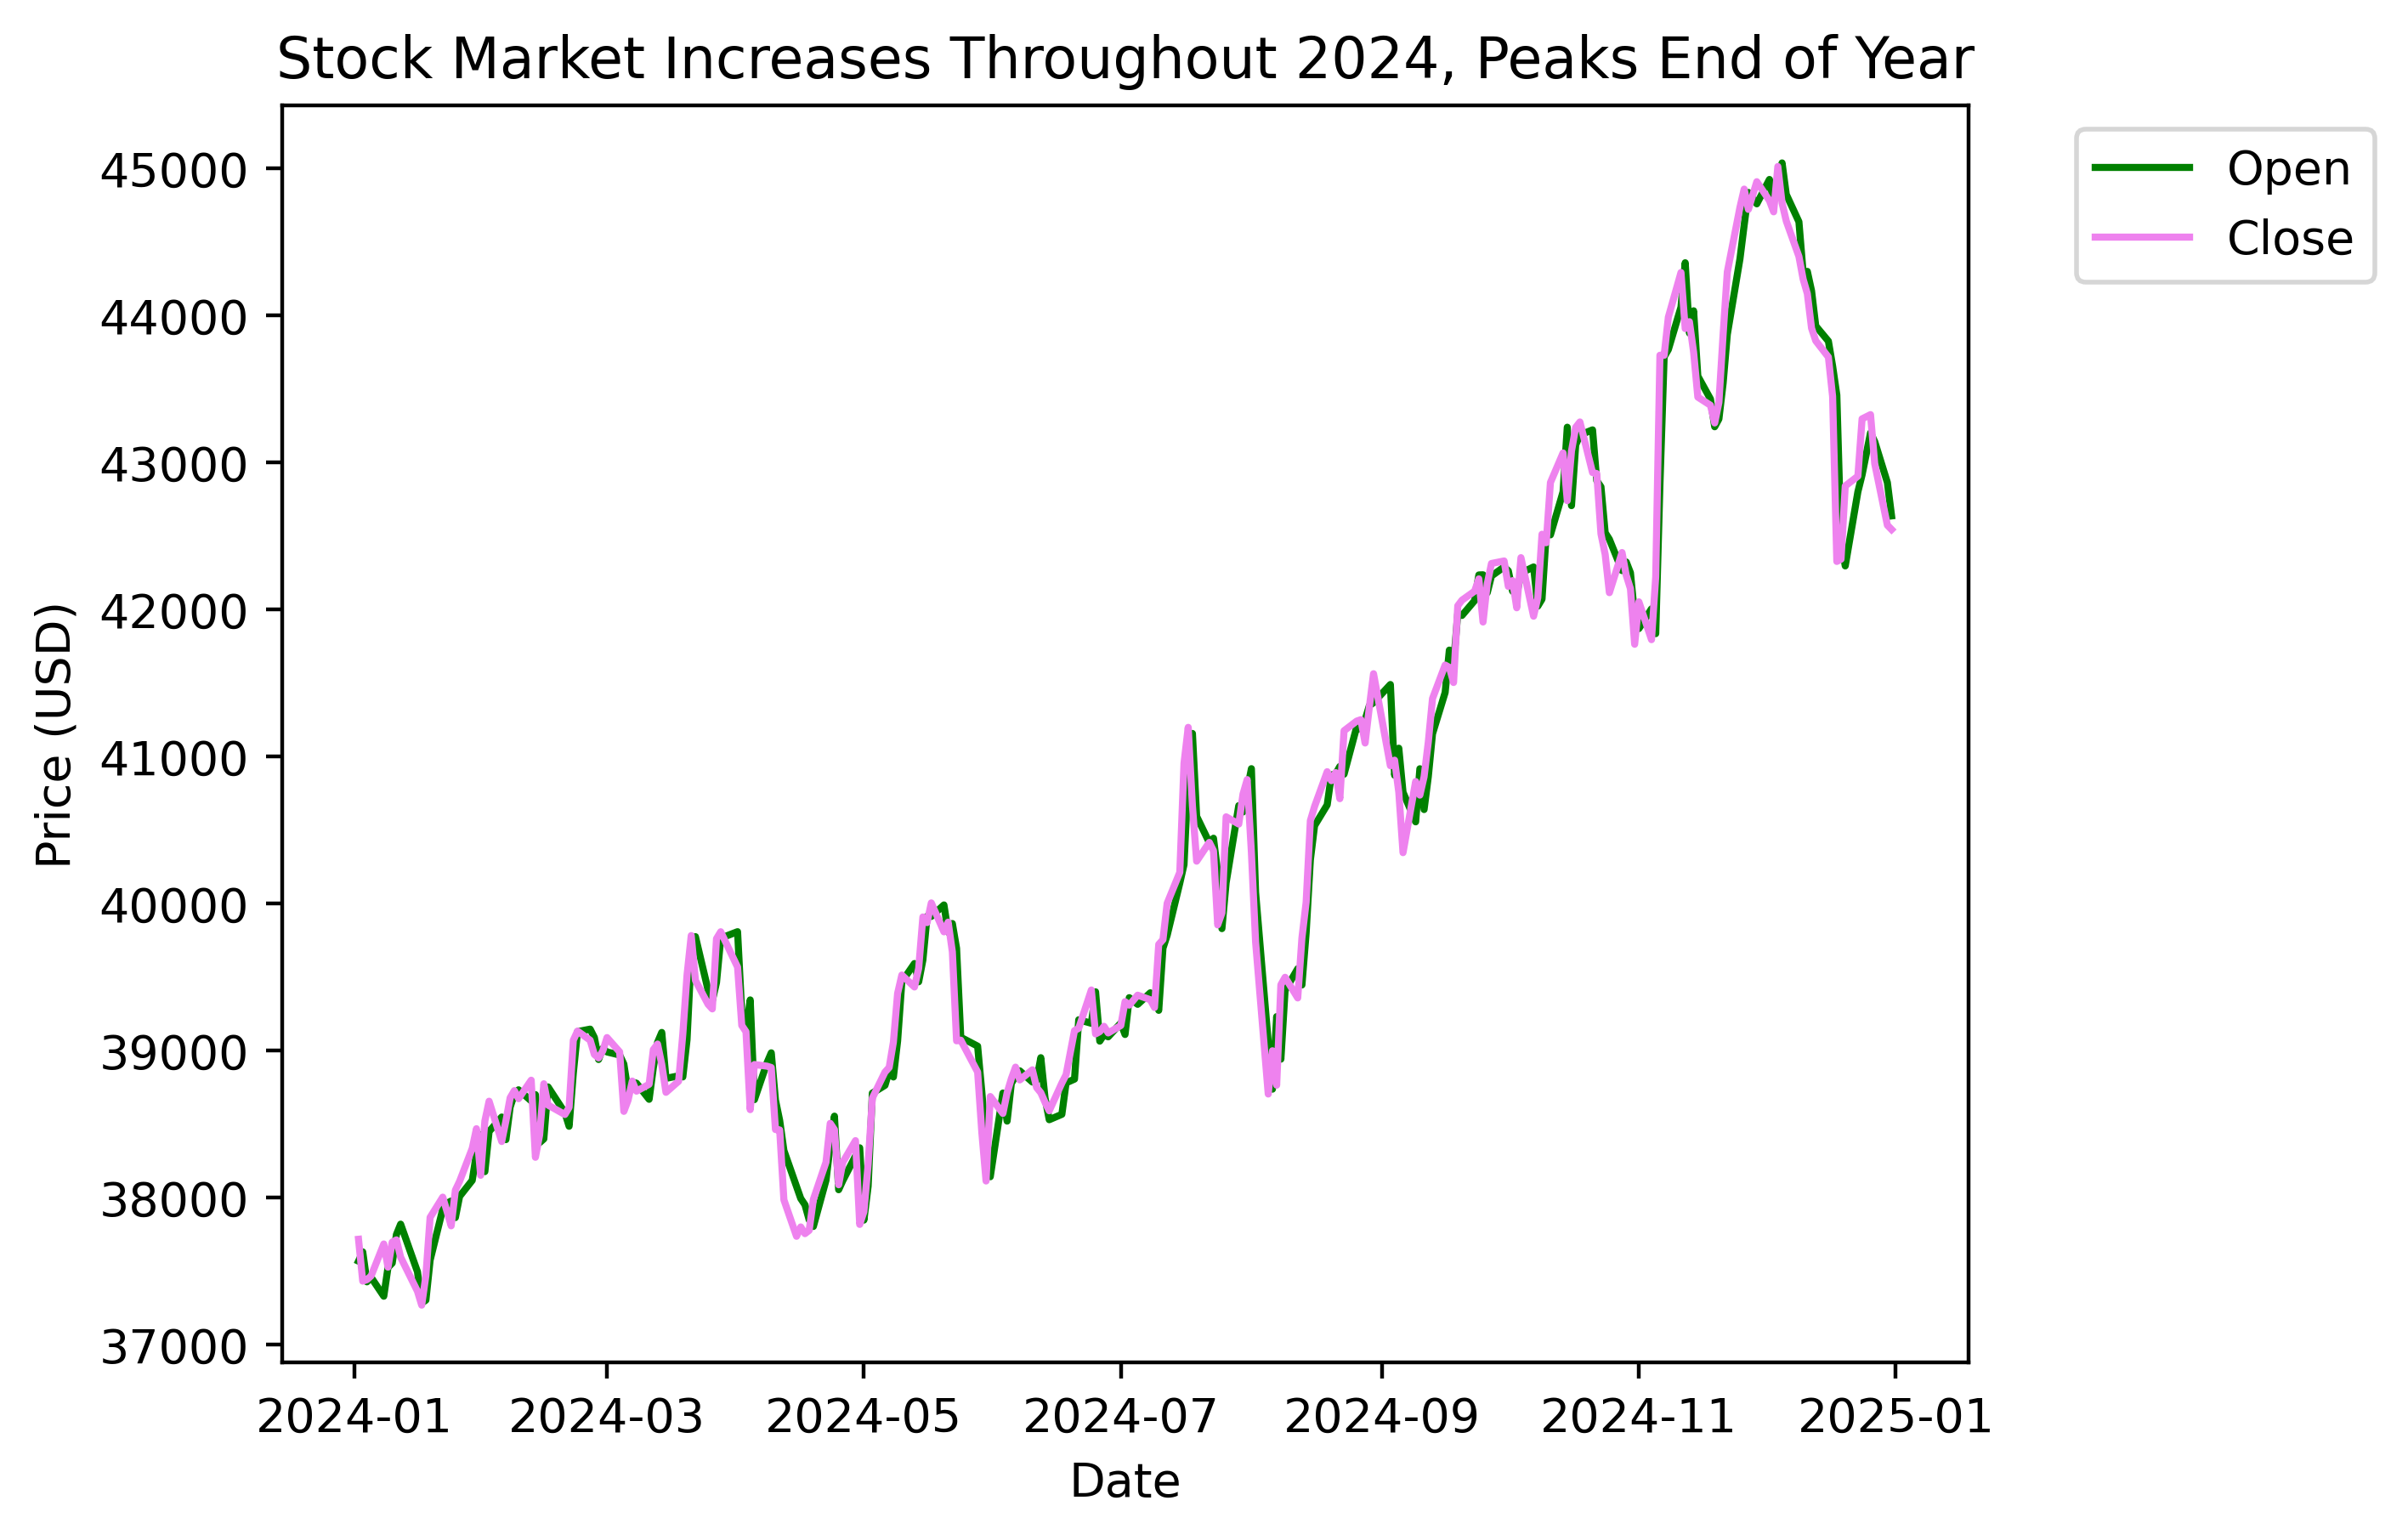

In [72]:
# Scaffolding
plt.plot(dj['Date'], dj['Open'], color = 'green', label = 'Open')
plt.plot(dj['Date'], dj['Close'], color = 'violet', label = 'Close')

plt.title('Stock Market Increases Throughout 2024, Peaks End of Year')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


### Problem 2
*3 points*

Using the Dow Jones Industrial Average data, recreate the monthly average dataset like we did in class. Keep all 12 months for this problem.    

Add the following scaffolding to the graph:
- x-axis label
- y-axis label: remember to be specific about the measurement
- Color: Change the color of the bar the correlates to the highest monthly average. Change the rest of the bars to gray.
- Title: Add a title that is descriptive and goes beyond the x and y axis labels (think about storytelling and the coloring of the bar you did).


Rubric
- 1 point for creating the graph
- 2 points for creating the graph + correctly adding two of the scaffolding elements
- 3 points for creating the graph + correctly adding all four scaffolding elements

In [27]:
# Import the calendar package
from calendar import month_name

# Order by months by chronological order
dj['Month'] = pd.Categorical(dj['Date'].dt.month_name(), month_name[1:])

# Group metrics by monthly averages
dj_monthly_mean = dj \
    .groupby('Month') \
    .mean() \
    .reset_index() \
    .head(12)

dj_monthly_mean

<ipython-input-27-417bdb4aa4aa>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Month') \


,Month,Date,Open,High,Low,Close
0,January,2024-01-16 09:08:34.285714176,37726.605714,37885.743333,37588.685238,37763.954762
1,February,2024-02-15 04:48:00.000000000,38685.346500,38823.823500,38534.799500,38720.518000
2,March,2024-03-15 02:24:00.000000000,39090.646000,39239.157000,38950.232000,39105.520000
3,April,2024-04-14 22:54:32.727272704,38504.349545,38628.500455,38246.146364,38401.217273
4,May,2024-05-15 20:43:38.181818112,39127.017273,39291.536818,38974.169091,39129.390455
5,June,2024-06-15 07:34:44.210526208,38875.291579,39037.696316,38693.826316,38903.730526
6,July,2024-07-16 04:21:49.090909184,40026.171818,40289.493182,39888.354545,40086.031818
7,August,2024-08-16 01:05:27.272727296,40298.926364,40513.165000,40069.460909,40310.814545
8,September,2024-09-15 21:36:00.000000000,41509.175000,41701.973000,41266.660000,41490.883000
9,October,2024-10-16 00:00:00.000000000,42518.236522,42666.024348,42301.006087,42494.197391


Text(0, 0.5, 'Price (USD)')

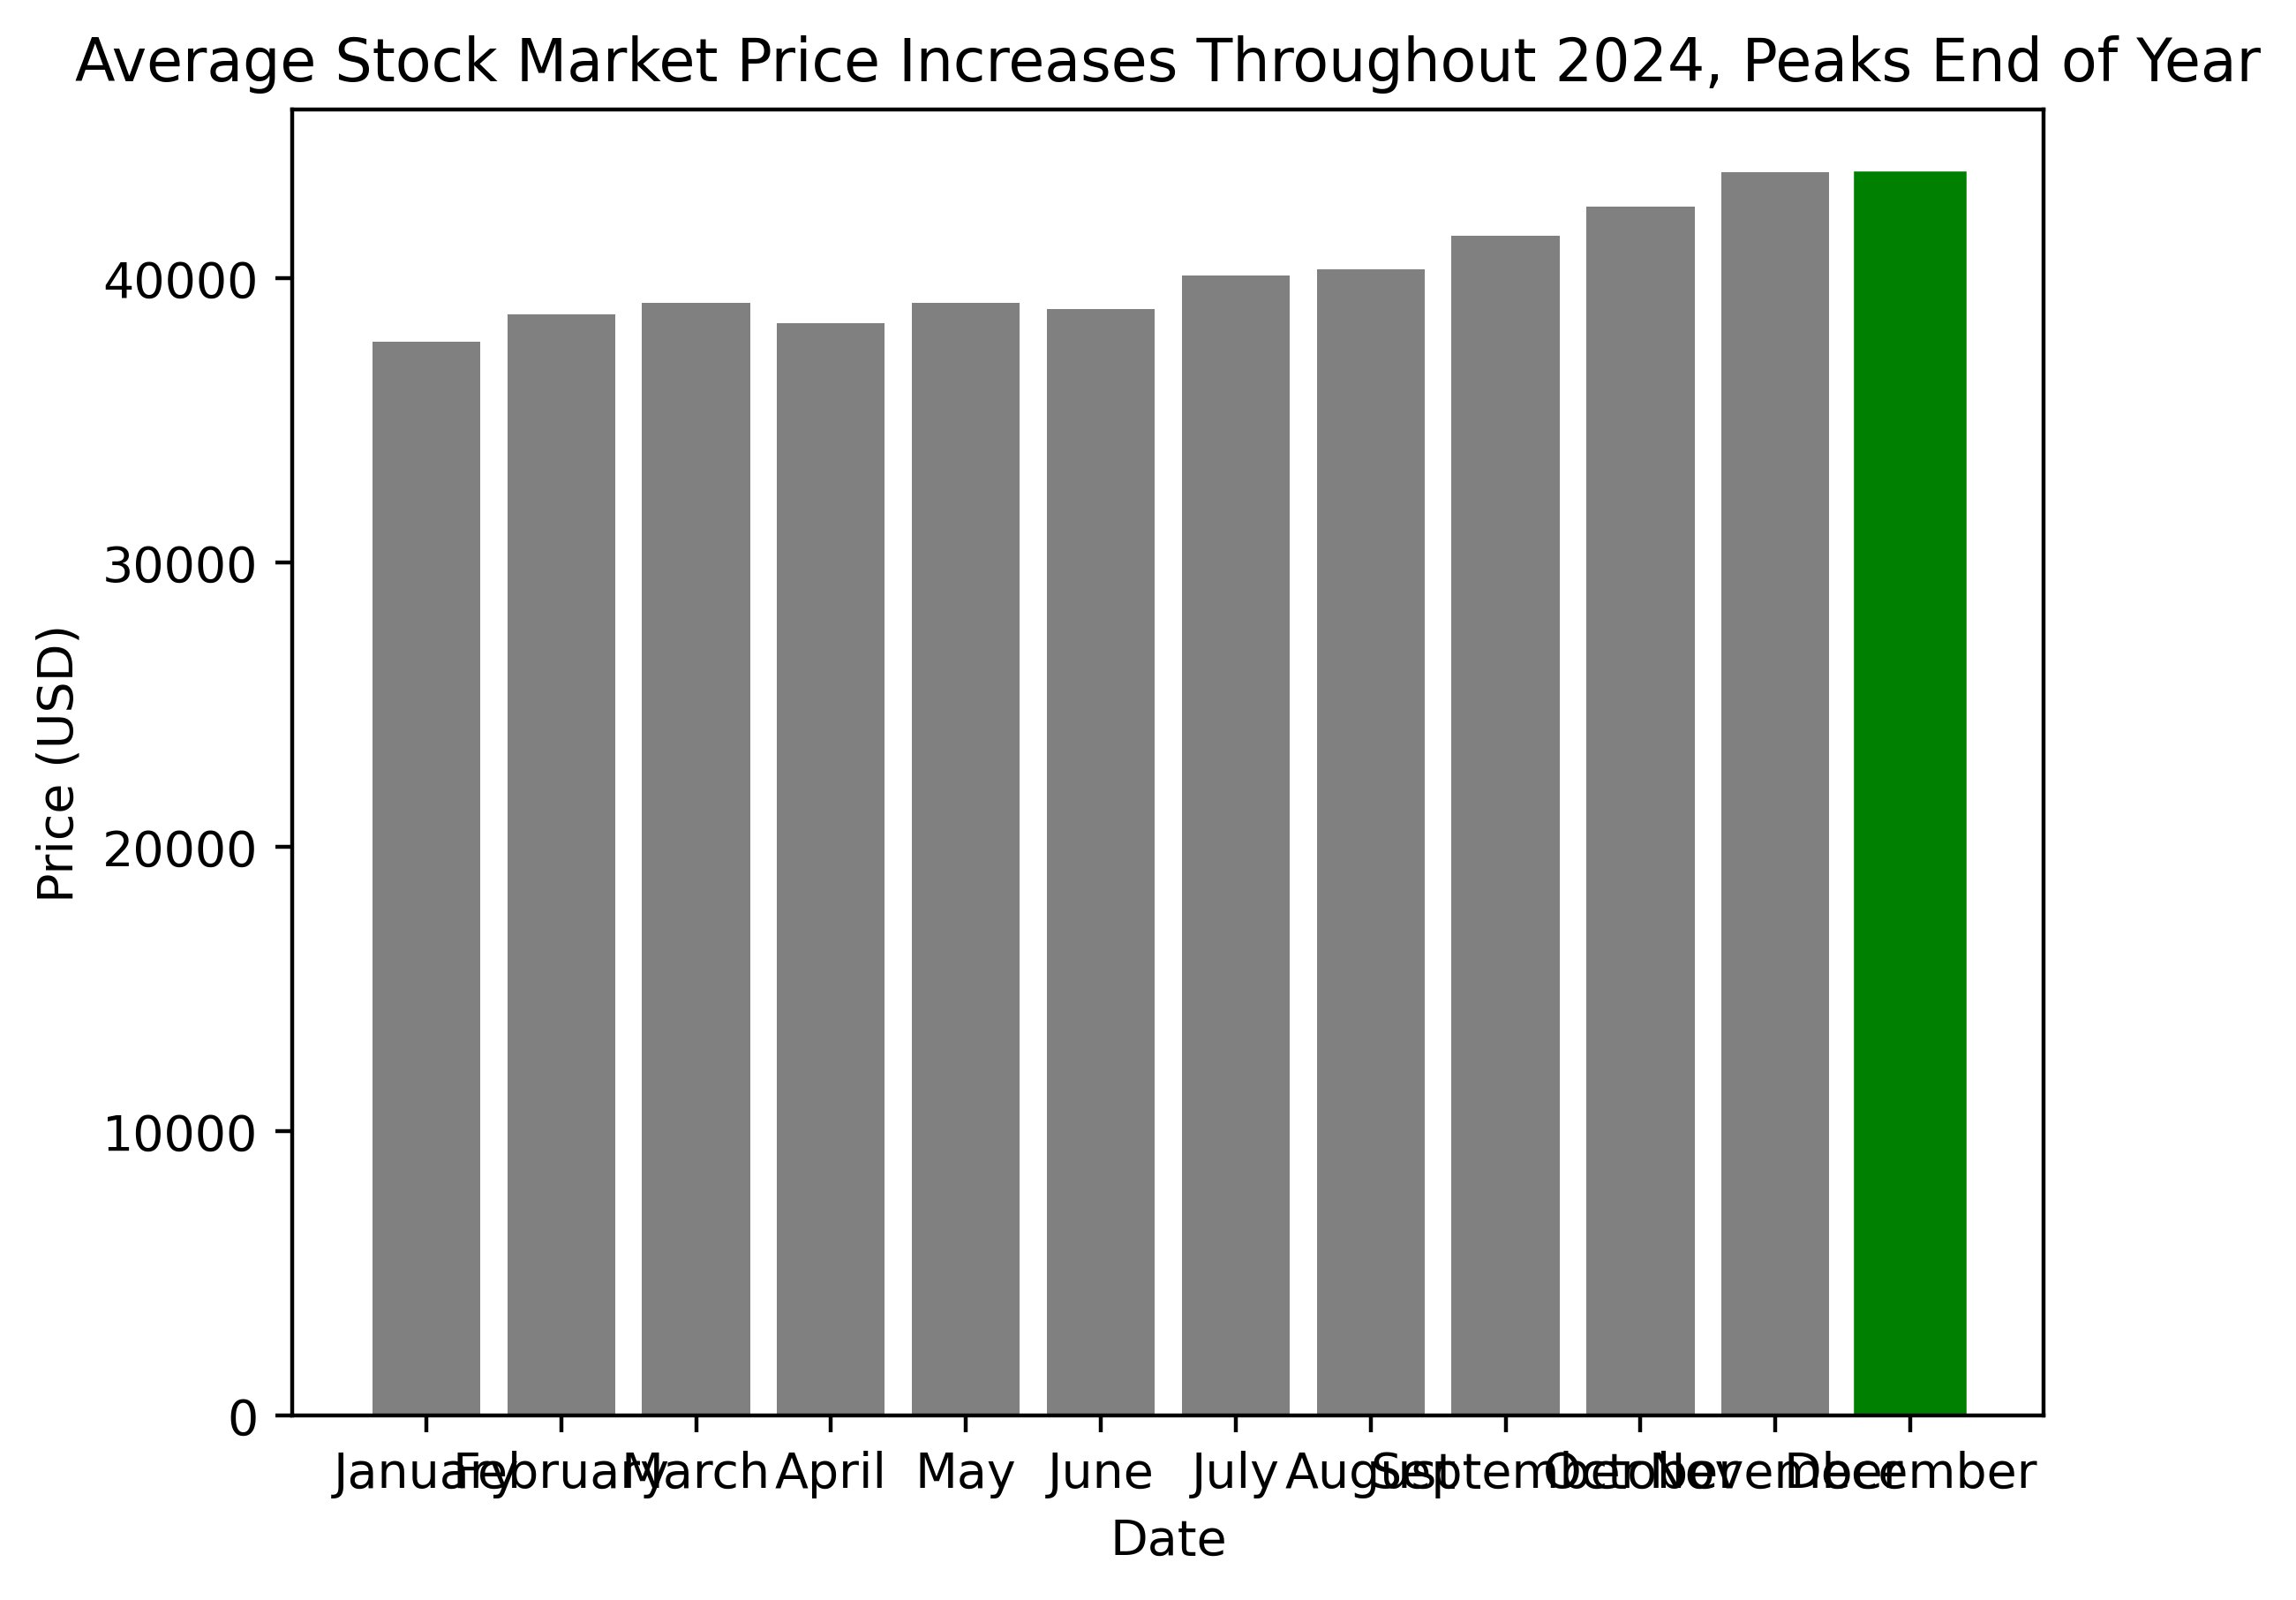

In [61]:
bar_graph = plt.bar(dj_monthly_mean['Month'], height = dj_monthly_mean['Close'], color='grey')
bar_graph[-1].set_color("green")

plt.title('Average Stock Market Price Increases Throughout 2024, Peaks End of Year')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

### Problem 3
*4 points*

Seaborn is a Python data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. In this problem, you will create a scatter plot using Seaborn. Seaborn documentation can be found here: [Seaborn](https://seaborn.pydata.org/).

In [47]:
#import seaborn
# if you have not installed seaborn, you can install it using pip [remove the pip install seaborn from the notebook]
import seaborn as sns #sns is the common alias for seaborn

# Seaborn come with a few datasets to get you started and one of them is the famous iris dataset.
# You can load the iris dataset using the following code:
iris = sns.load_dataset('iris')
iris.head() # This will display the first 5 rows of the dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


> More on the [Iris Dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set#:~:text=The%20data%20set%20consists%20of,sepals%20and%20petals%2C%20in%20centimeters.)

Create a scatter plot in Seaborn using iris dataset. Make the points different colors based on the species.

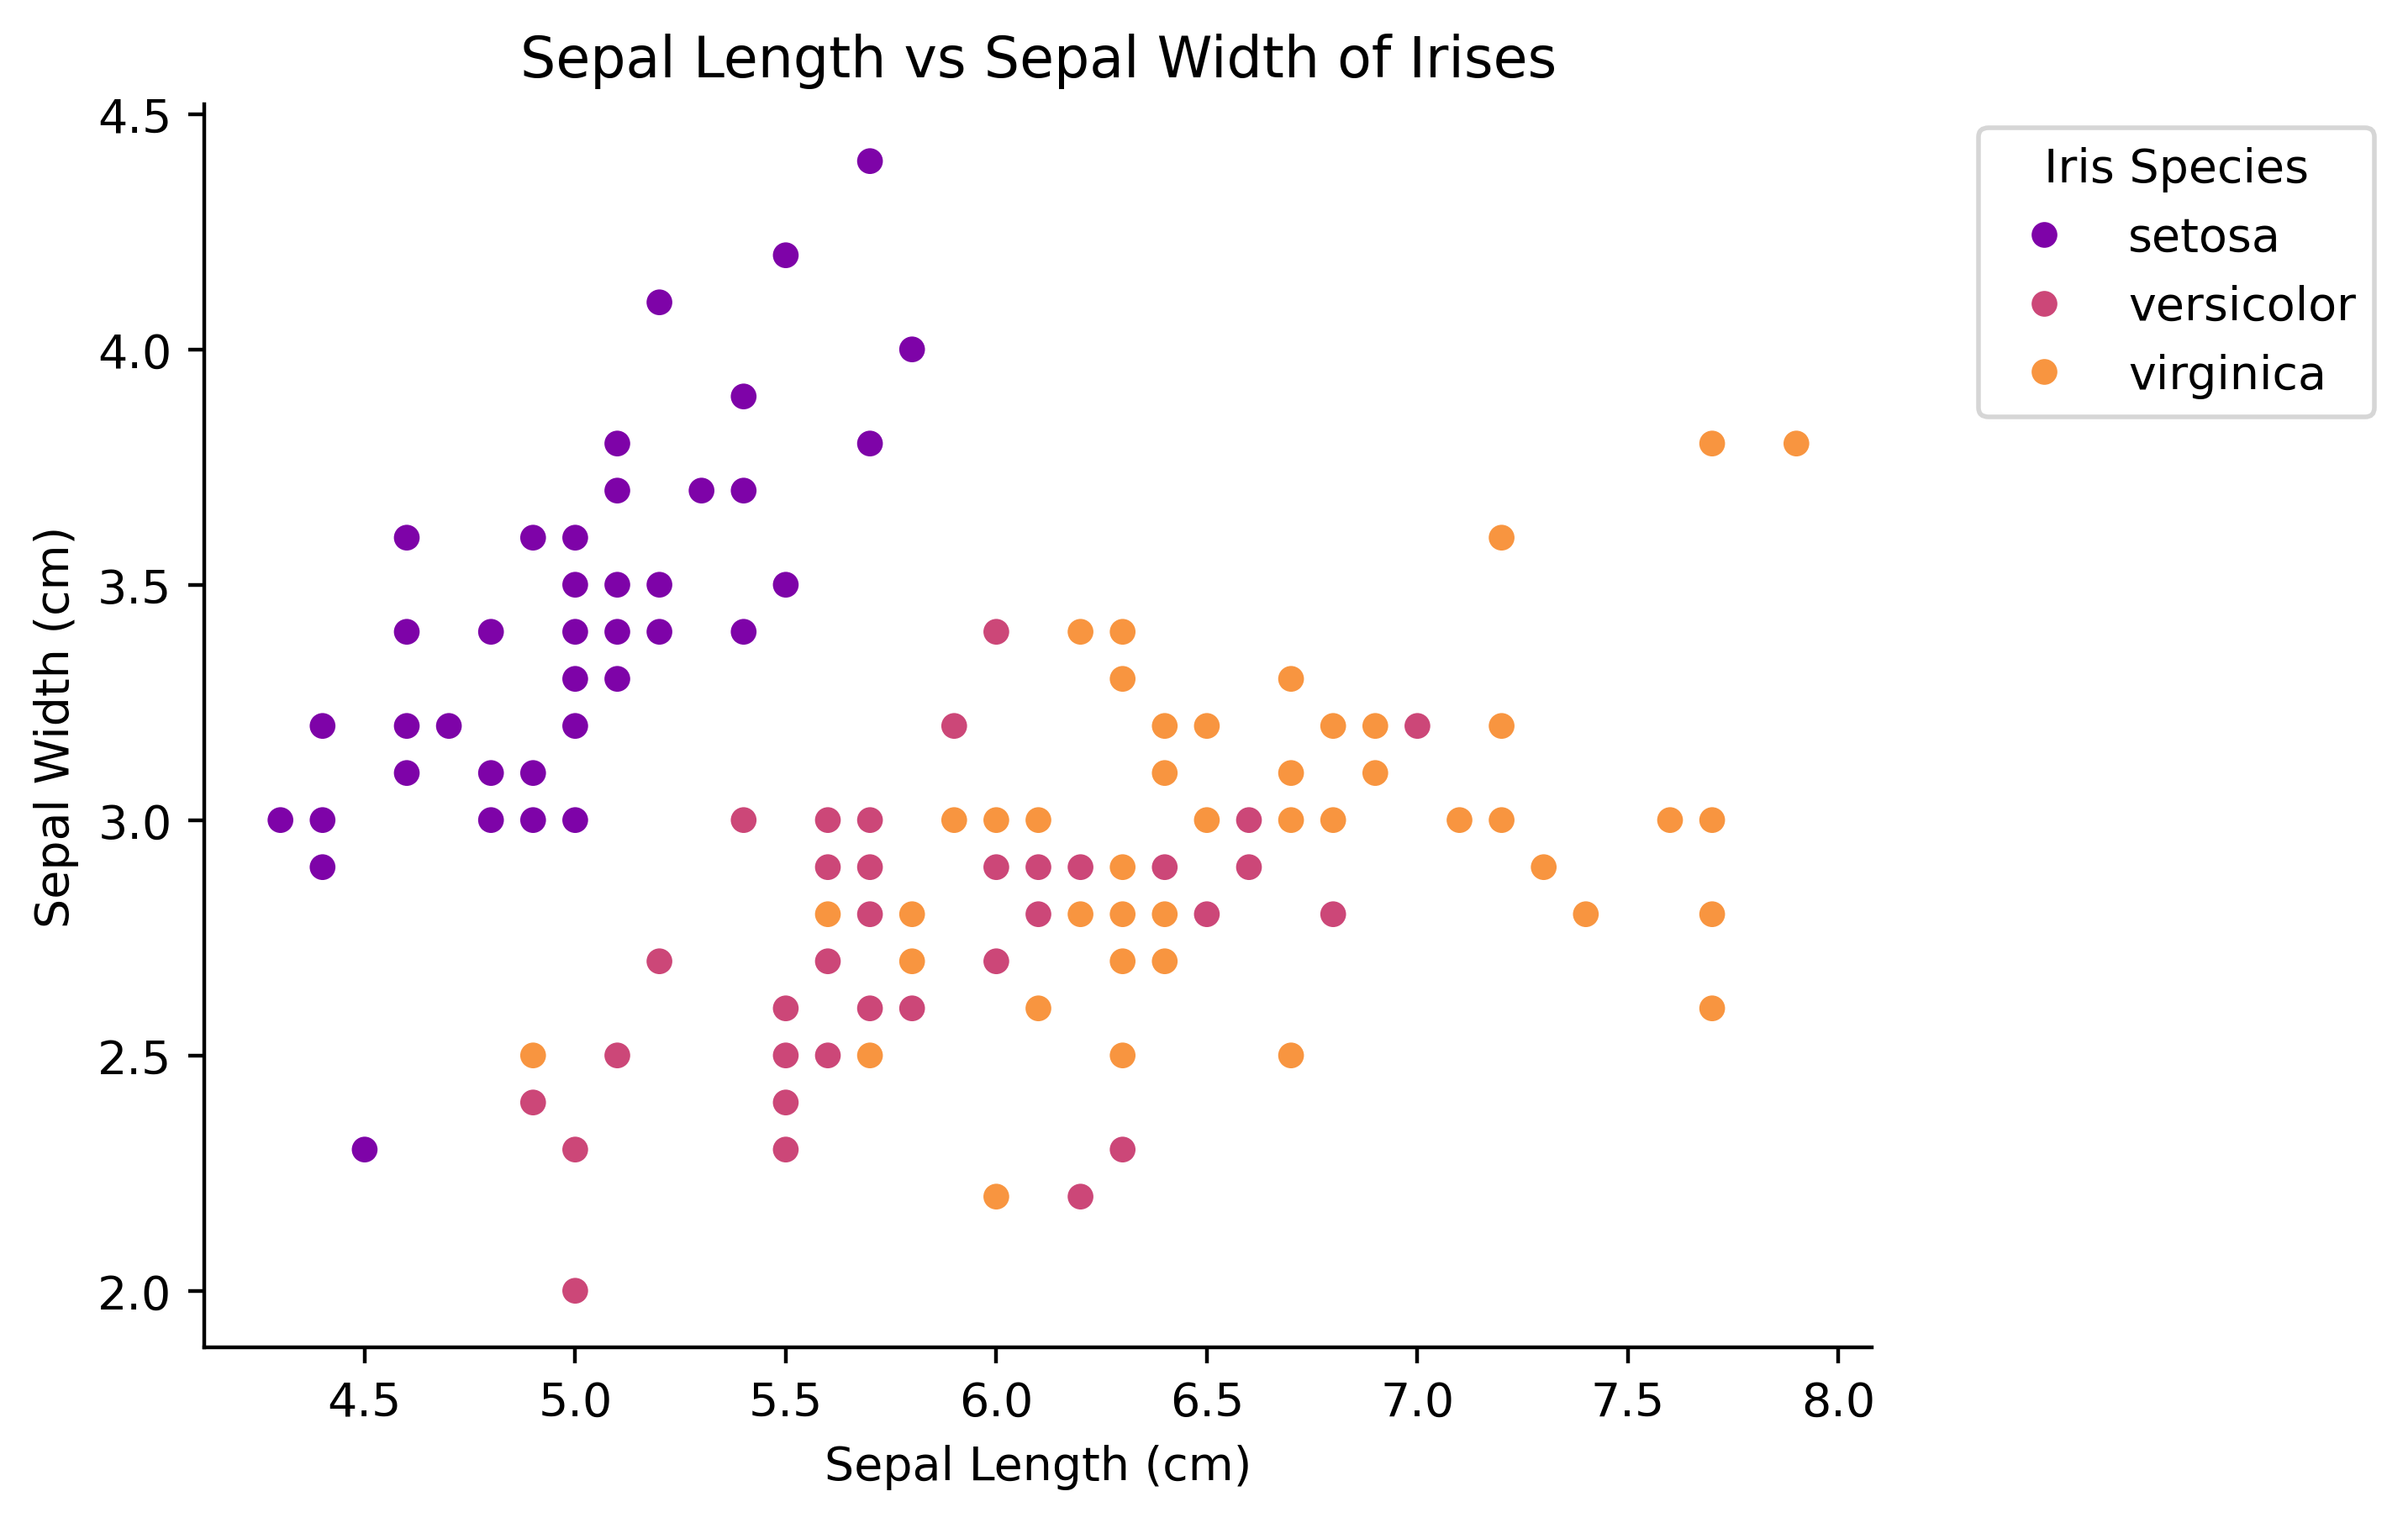

In [60]:
iris = iris.rename(columns = {'sepal_length': 'Sepal Length', 'sepal_width': 'Sepal Width'})
sns.scatterplot(data=iris, x='Sepal Length', y='Sepal Width', hue='species', palette='plasma')

plt.title("Sepal Length vs Sepal Width of Irises")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(title='Iris Species', bbox_to_anchor=(1.05, 1), loc='upper left')

sns.despine()

Update the following elements:
- x-axis label to 'Sepal Length' (hint: what are the units?)
- y-axis label to 'Sepal Width' (hint: what are the units?)
- Add a title
- Change the colors using a seaborn palette different from the default. Check out the palettes [here](https://r02b.github.io/seaborn_palettes/)
- Move the legend outside of the plotting area.
- Keep only the x and y axis lines (i.e. remove right and top lines).

Rubric
- 1 point for creating the initial seaborn scatter plot
- 2 points for the inital scatter plot + correctly changing the axes titles and adding a title.
- 3 points for the initial scatter plot + correctly changing the axes titles, adding a title, and changing the colors.
- 4 points for the initial scatter plot + correctly changing the axes titles, adding a title, changing the colors, and moving the legend outside of the plotting area.

### Problem 4   
*5 points*  
Provide a brief answer to teh following questions:

1 - Why is Matplotlib considered a low-level library and Seaborn a high-level library?

2 - Why do we still call `plt` from Matplotlib when using Seaborn?  

Rubric
- 1 point for providing an answer to both questions
- 2.5 points for providing a correct answer to one question
- 5 points for providing a correct answer to both questions

1. Seaborn is considered a high-level library because it is built on top of Matplotlib, a low-level library. This means that, while Matplotlib gives you many options for granular customizations, it will likley take a lot of code to get the result you want. Seaborn is able to create very visually appealing graphs with its extensive customization while also making your code more concise. For instance, trying to remove the spines using just Matplotlib would require two lines of code, whereas Seaborn has a single function for that purpose.

2. Since Seaborn was built on top of Matplotlib, the plt function can still be used. This means that you can load in your dataset using Seaborn, granting yourself access to that library's color palettes and others functions in addition to Matplotlib's customization options such as the x or y labels. This way, if you are already used to many common Matplotlib functions such as the ones mentioned, you can still use them in addition to Seaborn's more high level functioning.